Notes:
 - [Image Classification](https://developers.google.com/machine-learning/practica/image-classification)

Imports

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.signal
import keras

from PIL import Image



Load data

In [25]:
data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

print(data1.shape)
print(sprites1.shape)

selected_data = data1[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0)
print(selected_data.shape)

selected_sprites = sprites1[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0)
print(selected_sprites.shape)

(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)


In [34]:
data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)
mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

print(data_with_mirrored.shape)
print(sprites_with_mirrored.shape)


(1190, 5)
(1190, 16, 16, 3)


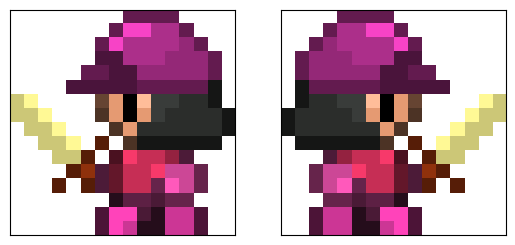

In [41]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1])
for ax in fig.get_axes():
    ax.set_xticks([])
    ax.set_yticks([])


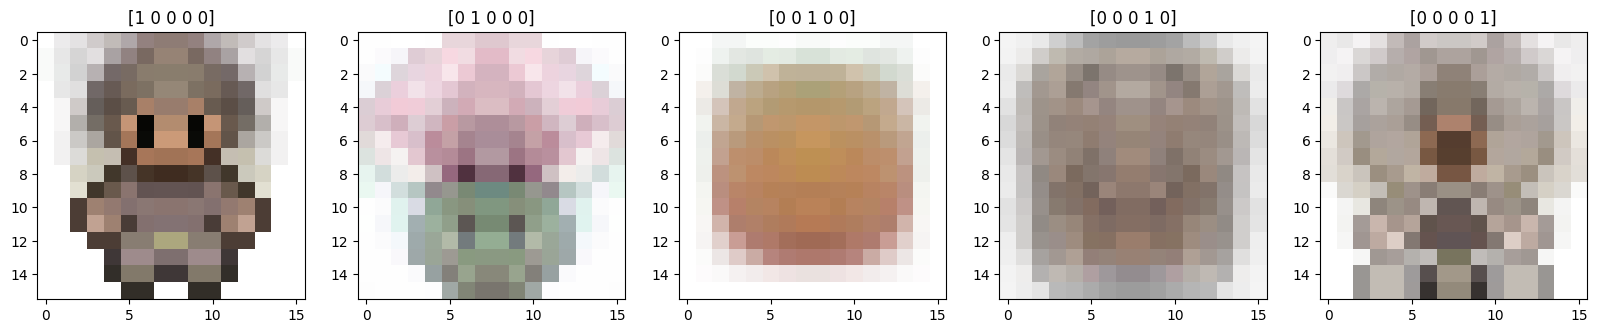

In [89]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))

labels = np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]])

for i in range(5):
    mask = np.all(data_with_mirrored == labels[i], axis=1)
    average = np.sum(sprites_with_mirrored[mask], axis=0) / np.sum(mask)
    average /= 255
    
    ax[i].imshow(average)
    ax[i].set_title(str(labels[i]))

In [98]:
from sklearn.model_selection import train_test_split

X = sprites_with_mirrored
y = data_with_mirrored

X = X.astype(np.float32) / 255

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)